In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from statsmodels.graphics.mosaicplot import mosaic

# Heart failure clinical records exploring

This dataset contains the medical records of 299 patients who had heart failure, collected during their follow-up period, where each patient profile has 13 clinical features.

> https://archive.ics.uci.edu/ml/datasets/Heart+failure+clinical+reco

As it turned out while working on data analysis, not all data is suitable for all activities. In my opinion, the above dataset is more suitable for classification than for presenting information and analyzing fundamental relationships between variables. But despite this, I tried to get as much information as possible from this data.

In [2]:
df = pd.read_csv("heart_failure_clinical_records_dataset.csv")
df.head()

,age,anaemia,creatinine_phosphokinase,diabetes,ejection_fraction,high_blood_pressure,platelets,serum_creatinine,serum_sodium,sex,smoking,time,DEATH_EVENT
0,75.0,0,582,0,20,1,265000.00,1.9,130,1,0,4,1
1,55.0,0,7861,0,38,0,263358.03,1.1,136,1,0,6,1
2,65.0,0,146,0,20,0,162000.00,1.3,129,1,1,7,1
3,50.0,1,111,0,20,0,210000.00,1.9,137,1,0,7,1
4,65.0,1,160,1,20,0,327000.00,2.7,116,0,0,8,1


### Comment
After viewing the first rows of the dataset we can notice which variables are numerical and which are categorical. Also we can notice and assume that age will be base variable wchich we will be comparing other data.

In [3]:
print(df.columns)
cr_categorical_df = ['anaemia', 'high_blood_pressure', 'diabetes', 'smoking', 'sex', 'DEATH_EVENT']
cr_numerical_df = ['age', 'creatinine_phosphokinase', 'ejection_fraction', 'platelets', 'serum_creatinine', 
                   'serum_sodium', 'time']

Index(['age', 'anaemia', 'creatinine_phosphokinase', 'diabetes',
       'ejection_fraction', 'high_blood_pressure', 'platelets',
       'serum_creatinine', 'serum_sodium', 'sex', 'smoking', 'time',
       'DEATH_EVENT'],
      dtype='object')


### Comment
Compared to house sales datasets, we don't have variables here that we don't know which group to assign to. All categorical values are clearly boolean.

In [4]:
df[cr_numerical_df].describe()

,age,creatinine_phosphokinase,ejection_fraction,platelets,serum_creatinine,serum_sodium,time
count,299.000000,299.000000,299.000000,299.000000,299.00000,299.000000,299.000000
mean,60.833893,581.839465,38.083612,263358.029264,1.39388,136.625418,130.260870
std,11.894809,970.287881,11.834841,97804.236869,1.03451,4.412477,77.614208
min,40.000000,23.000000,14.000000,25100.000000,0.50000,113.000000,4.000000
25%,51.000000,116.500000,30.000000,212500.000000,0.90000,134.000000,73.000000
50%,60.000000,250.000000,38.000000,262000.000000,1.10000,137.000000,115.000000
75%,70.000000,582.000000,45.000000,303500.000000,1.40000,140.000000,203.000000
max,95.000000,7861.000000,80.000000,850000.000000,9.40000,148.000000,285.000000


### Comment
We can notice that *count* isn't meaningful statistic. The most significant and useful statistic turns out to be the *mean*. Looking at the mean for each column, we see that on average a person with heart failure is 61 years old and their duration of medical care was 130 days. Also average the percentage of blood leaving the heart with each contraction was 38.

A useful value that describe function returns is also the maximum and minimum of a given column. Thanks to this, we can easily find out that the patients age is between 40 and 95 years. 

<AxesSubplot:xlabel='Age', ylabel='Count'>

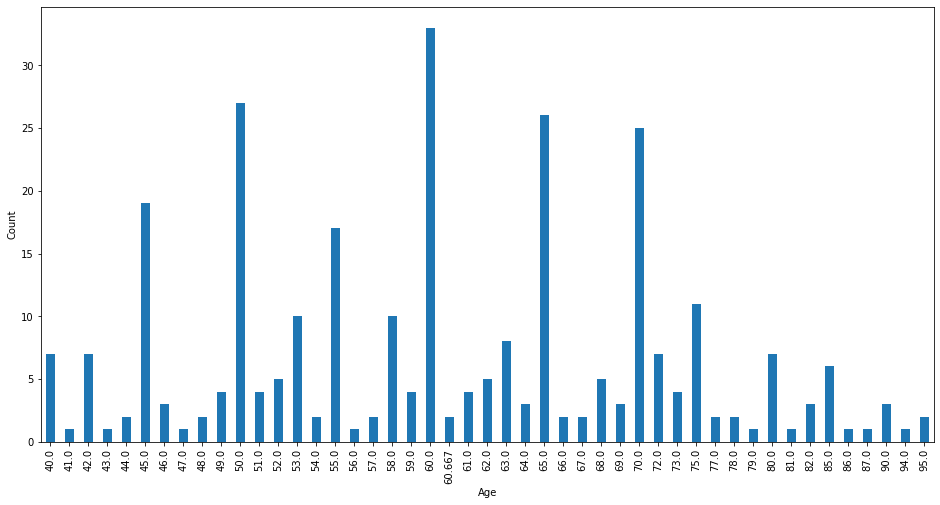

In [5]:
df_groups = df.groupby(['age'])['age'].count()
df_groups.plot(kind='bar', ylabel='Count', xlabel='Age', figsize=(16, 8))

### Comment
From this chart, we can see that the greatest number is people aged 60, followed by 50, 65, 70.

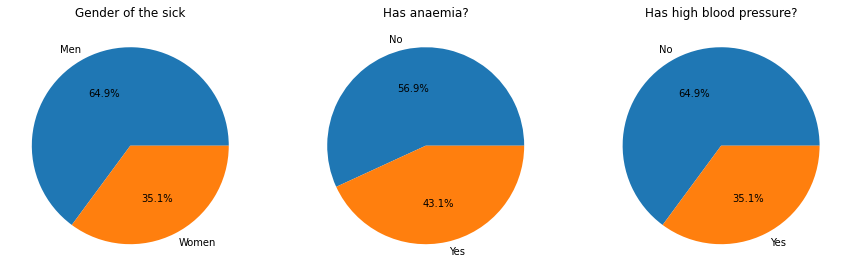

In [6]:
fig, axes = plt.subplots(1, 3, figsize=(15, 15))

axes[0].pie(df['sex'].value_counts(), labels=['Men', 'Women'], autopct='%1.1f%%') 
axes[0].set_title('Gender of the sick', fontsize = 12)

axes[1].pie(df['anaemia'].value_counts(), labels=['No', 'Yes'], autopct='%1.1f%%')
axes[1].set_title('Has anaemia?', fontsize = 12)

axes[2].pie(df['high_blood_pressure'].value_counts(), labels=['No', 'Yes'], autopct='%1.1f%%')
axes[2].set_title('Has high blood pressure?', fontsize = 12);

### Comment
Here, I have presented basic information about the subjects in pie charts. It is easy to see that approximately 65% were male, 43% had anaemia and 35% had high blood pressure.

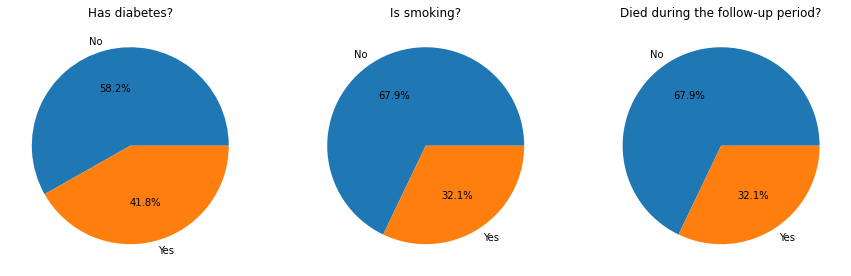

In [7]:
fig, axes = plt.subplots(1, 3, figsize=(15, 15))

axes[0].pie(df['diabetes'].value_counts(), labels=['No', 'Yes'], autopct='%1.1f%%') 
axes[0].set_title('Has diabetes?', fontsize = 12)

axes[1].pie(df['smoking'].value_counts(), labels=['No', 'Yes'], autopct='%1.1f%%')
axes[1].set_title('Is smoking?', fontsize = 12)

axes[2].pie(df['DEATH_EVENT'].value_counts(), labels=['No', 'Yes'], autopct='%1.1f%%')
axes[2].set_title('Died during the follow-up period?', fontsize = 12);

### Comment
58% of patients were diabetic, while 68% of patients smoked, and the same percentage of patients died during the follow-up period.

Text(0, 0.5, 'time [days]')

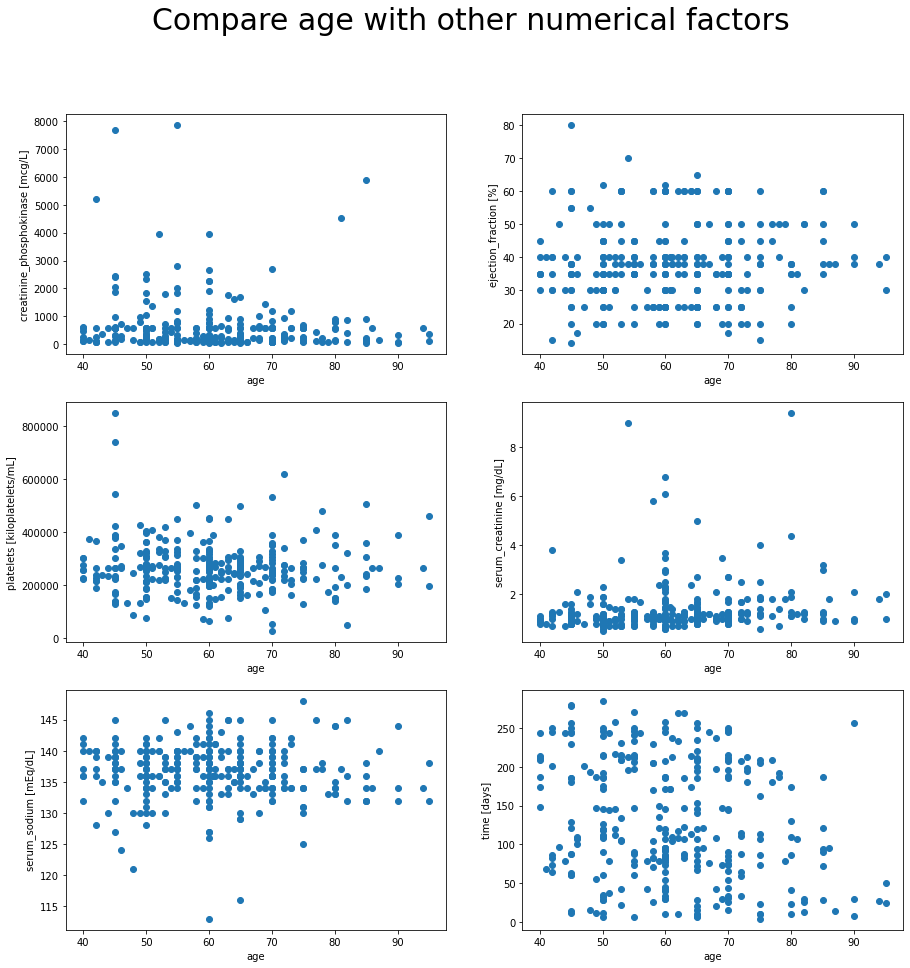

In [8]:
fig, axes = plt.subplots(3, 2, figsize=(15, 15))
fig.suptitle('Compare age with other numerical factors', fontsize = 30)

axes[0][0].scatter(df.age, df.creatinine_phosphokinase) 
axes[0][0].set_xlabel("age")
axes[0][0].set_ylabel("creatinine_phosphokinase [mcg/L]")

axes[0][1].scatter(df.age, df.ejection_fraction) 
axes[0][1].set_xlabel("age")
axes[0][1].set_ylabel("ejection_fraction [%]")

axes[1][0].scatter(df.age, df.platelets) 
axes[1][0].set_xlabel("age")
axes[1][0].set_ylabel("platelets [kiloplatelets/mL]")

axes[1][1].scatter(df.age, df.serum_creatinine) 
axes[1][1].set_xlabel("age")
axes[1][1].set_ylabel("serum_creatinine [mg/dL]")

axes[2][0].scatter(df.age, df.serum_sodium) 
axes[2][0].set_xlabel("age")
axes[2][0].set_ylabel("serum_sodium [mEq/dL]")

axes[2][1].scatter(df.age, df.time) 
axes[2][1].set_xlabel("age")
axes[2][1].set_ylabel("time [days]")

### Comment
After comparing human age with other factors, we can observe several conclusions.

* In people up to 70 years of age, CPK enzyme in the blood usually did not exceed 3,000 mcg/L. Above that age, the value of this enzyme in the blood of the subjects was below 2,000 mcg/L.

* None of the patients has 100% cardiac output, but a normal value is considered to be greater than 60%. A large number of those observed have reduced efficiency. No such extreme impairment of endurance has been observed in people over 80 years of age.

* Most of those observed had platelets below 400,000 kiloplatelets/mL. And only a small group of respondents exceeded 600,000.

* Most people heve serum creatinine level below 2 mg/dL. But in the other hand we can see that serum creatinine levels are elevated in samples from people aged 55-80. 

* Most people heve serum sodium level above 130 mEq/dL. But also we can notice that some people have lover values and these are mainly people under the age of 75.

* The age of the patient had no effect on the follow-up period. Only with patients over 80 we see a shortening of this time.

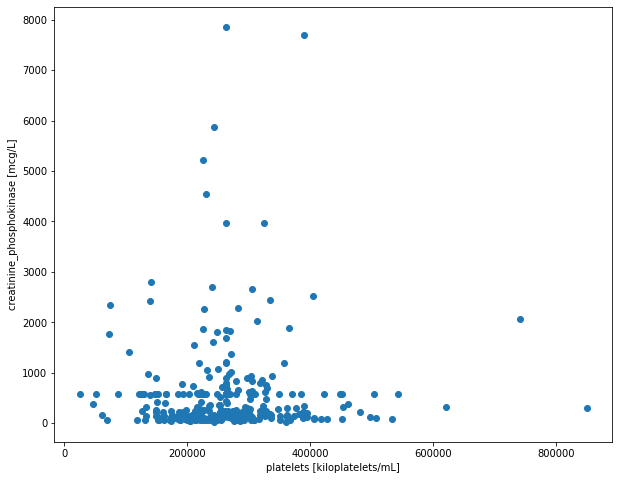

In [9]:
plt.figure(figsize=(10, 8))
plt.ticklabel_format(axis="y", style='plain')
plt.xlabel("platelets [kiloplatelets/mL]")
plt.ylabel("creatinine_phosphokinase [mcg/L]")
plt.scatter(df.platelets, df.creatinine_phosphokinase)

### Comment
In the chart, we can read that people with low and high levels of platelets (below 200,000 and above 400,000) have low creatine kinase. In the remaining people, the result was recorded over a dozen extremely high CPK results.

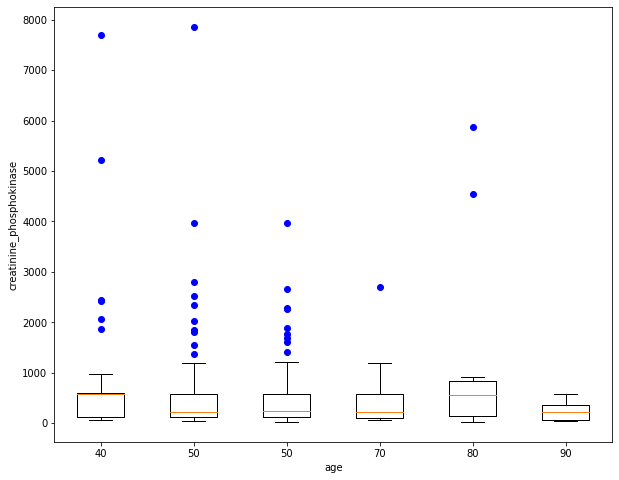

In [10]:
df_box = df[['creatinine_phosphokinase', 'age']].copy()
df_box['age'] = np.floor(df_box['age']/10)*10
df_grouped = df_box.groupby('age')['creatinine_phosphokinase'].apply(list)
plt.figure(figsize=(10, 8))
plt.ticklabel_format(axis="y", style='plain')
plt.xlabel("age")
plt.ylabel("creatinine_phosphokinase")
plt.boxplot(df_grouped, flierprops=dict(markeredgecolor='blue', markerfacecolor='blue', marker='o'))
plt.xticks([1, 2, 3, 4, 5, 6], [40, 50, 50, 70, 80, 90]);

### Comment
Comparing to scatter diagram above we can see that the shape is similar, in places where we have crowded information, on the box plot we see "boxes" which inform us that this is where most of the data is. The remaining values are the same as the outliers.

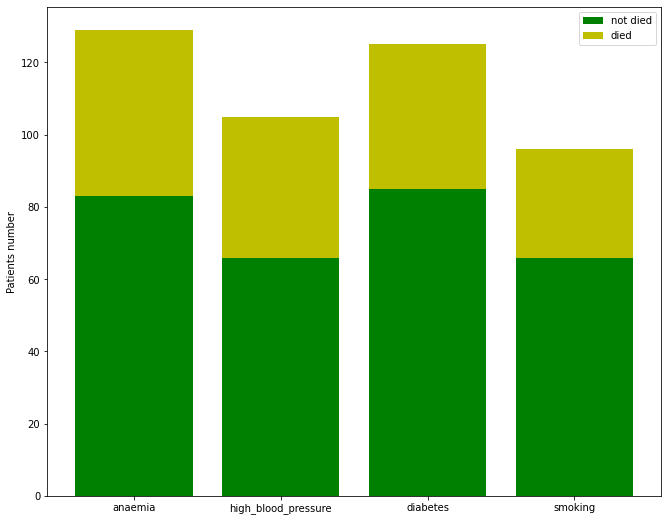

In [11]:
y1 = []
y2 = []

cat_df = df[cr_categorical_df]

y1.append(cat_df[(df.anaemia == 1) & (df.DEATH_EVENT == 0)].count()[0]) 
y2.append(cat_df[(df.anaemia == 1) & (df.DEATH_EVENT == 1)].count()[0]) 
y1.append(cat_df[(df.high_blood_pressure == 1) & (df.DEATH_EVENT == 0)].count()[0]) 
y2.append(cat_df[(df.high_blood_pressure == 1) & (df.DEATH_EVENT == 1)].count()[0]) 
y1.append(cat_df[(df.diabetes == 1) & (df.DEATH_EVENT == 0)].count()[0]) 
y2.append(cat_df[(df.diabetes == 1) & (df.DEATH_EVENT == 1)].count()[0]) 
y1.append(cat_df[(df.smoking == 1) & (df.DEATH_EVENT == 0)].count()[0]) 
y2.append(cat_df[(df.smoking == 1) & (df.DEATH_EVENT == 1)].count()[0]) 

plt.figure(figsize=(11, 9))
plt.ylabel('Patients number')
plt.bar(cr_categorical_df[:-2], y1, color='g')
plt.bar(cr_categorical_df[:-2], y2, bottom=y1, color='y')
 

plt.legend(['not died', 'died'])

### Comment
In the chart above, we can see that for each categorical determinant, the number of people who did not die during the follow-up prevails.

We also see that patients most often had problems with anemia and diabetes. Smokers are the least observed.

Text(0, 0.5, 'Is dead?')

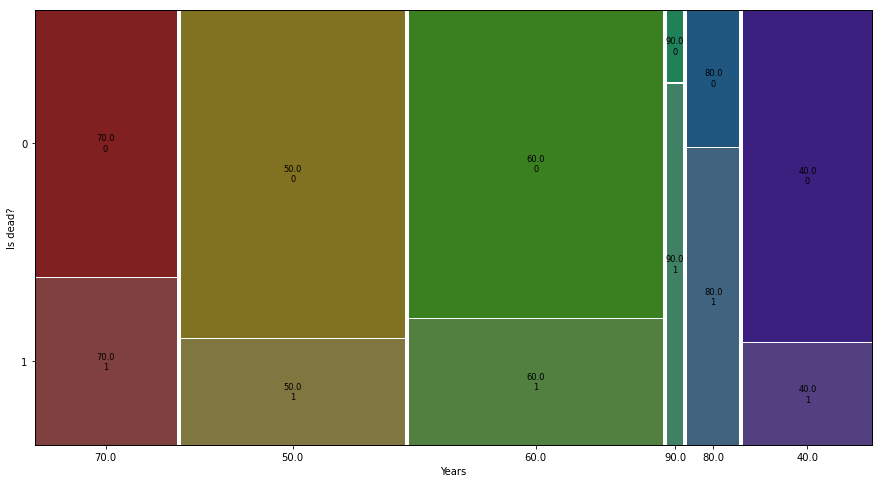

In [12]:
df1 = df[['age', 'DEATH_EVENT']].copy()
df1['age'] = np.floor(df1['age']/10)*10

figure, _ = mosaic(df1, ['age','DEATH_EVENT']);

figure.set_size_inches(15, 8)
figure.get_axes()[0].set_xlabel('Years')
figure.get_axes()[0].set_ylabel('Is dead?')

### Comment
For people under 80, we can see that they survived the follow-up. We also see that the predominant group of bad guys are people over 40 and over 50.

## Looking for persistent patients 
"I am interested in the patients with anaemia and high_blood_pressure problems who did not die during the observation."

In [13]:
condition = lambda df: (df['anaemia'] == 1) & (df['high_blood_pressure'] == 1) & (df['DEATH_EVENT'] == 0)
patients = df.loc[condition] 
patients[cr_numerical_df].describe()

,age,creatinine_phosphokinase,ejection_fraction,platelets,serum_creatinine,serum_sodium,time
count,29.000000,29.000000,29.000000,29.000000,29.000000,29.000000,29.000000
mean,62.126448,410.965517,41.931034,253874.414828,1.031034,137.551724,120.275862
std,7.658593,604.549388,13.362878,73962.373481,0.246553,4.205322,57.776600
min,49.000000,52.000000,20.000000,127000.000000,0.600000,126.000000,12.000000
25%,58.000000,96.000000,30.000000,203000.000000,0.900000,135.000000,83.000000
50%,60.667000,151.000000,40.000000,249000.000000,1.000000,137.000000,95.000000
75%,65.000000,514.000000,60.000000,290000.000000,1.100000,140.000000,172.000000
max,79.000000,2794.000000,60.000000,427000.000000,1.800000,145.000000,216.000000


### Comment
29 patients with anemia and high blood pressure did not die during the follow-up. The average duration of observation for these patients was 120 days.

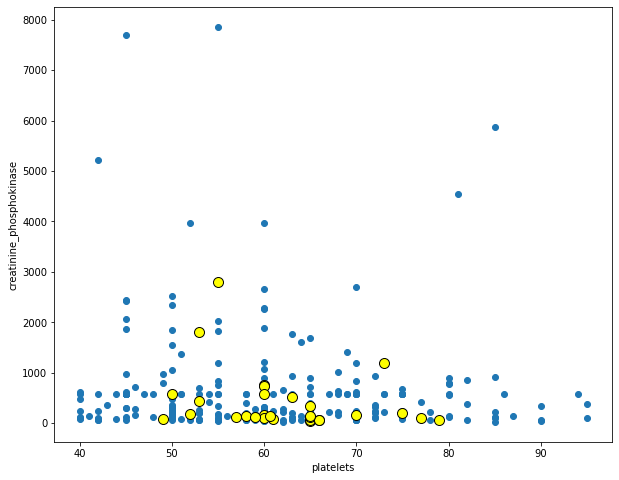

In [14]:
plt.figure(figsize=(10, 8))
plt.ticklabel_format(axis="y", style='plain')
plt.xlabel("platelets")
plt.ylabel("creatinine_phosphokinase")
plt.scatter(df.age, df.creatinine_phosphokinase)
plt.scatter(patients.age, patients.creatinine_phosphokinase, color='yellow', edgecolors='black', s=100)

### Comment
In anemics with high blood pressure who did not die during treatment, the CPK value is below 1000, only in 3 units this value is exceeded. These people are between 49 and 79 years old.

In [15]:
condition = lambda df: (df['anaemia'] == 1) & (df['high_blood_pressure'] == 1) & (df['smoking'] == 1) & (df['diabetes'] == 1) & (df['DEATH_EVENT'] == 0) 
df.loc[condition] 

,age,anaemia,creatinine_phosphokinase,diabetes,ejection_fraction,high_blood_pressure,platelets,serum_creatinine,serum_sodium,sex,smoking,time,DEATH_EVENT
78,75.0,1,203,1,38,1,283000.0,0.6,131,1,1,74,0
255,52.0,1,191,1,30,1,334000.0,1.0,142,1,1,216,0


### Comment
Two people, despite many diseases, survived during the observation period. They are two men aged 75 and 52 follow-up was 74 and 216 days.